<a href="https://colab.research.google.com/github/melbaperez/Dog-Breed-Classifier/blob/main/Calificador_de_razas_de_perros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calificador de razas de perros

Vamos a desarrollar una red que reconozca diferentes razas de perros. Para ello, vamos a utilizar un dataset contenido en nuestra cuenta de Google Drive obtenido a través de Kaggle. Antes, debemos montar nuestro sistema de archivos de Google Drive para hacerlo accesible desde este *notebook*. Las razas de perros que identificará son:

*   Akita Inu
*   Beagle
*   Bull Dog
*   Chihuahua
*   Dachshund
*   Golden Retreiver
*   Poodle
*   Shih Tzu
*   Siberian Husky

En total, tendremos 9 razas a identificar. Esta red neuronal utiliza data augmentation. 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

Veamos una imagen de ejemplo.

'Akita Inu'  'Bull Dog'   Dachshund	     Poodle     Siberian_Husky
 Beagle       Chihuahua   Golden_Retreiver   Shih_Tzu


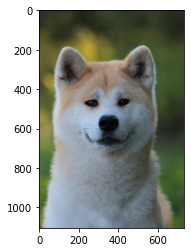

In [ ]:
!ls "/content/drive/My Drive/BreedsDog/"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/BreedsDog/Akita Inu/6.jpg', 'r') 
imshow(np.asarray(pil_im))



## Modelo

In [ ]:
# DATA SOURCE --------------------------------------------------

image_size = (150, 150)
batch_size = 32
directory="/content/drive/My Drive/BreedsDog"

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    validation_split=0.2,
    subset="validation",
    seed=1337, 
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    validation_split=0.2,
    brightness_range=(0.8, 1.2), 
    zoom_range=0.2)
train_ds = train_datagen.flow_from_directory(
        directory,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset="training",
        seed=1337)
val_ds = val_ds.prefetch(buffer_size=32)

Found 807 files belonging to 9 classes.
Using 161 files for validation.
Found 649 images belonging to 9 classes.


In [ ]:
# MODEL --------------------------------------------------

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten
from tensorflow.keras.callbacks import EarlyStopping

model = keras.Sequential()
model.add(Rescaling(scale=(1./127.5), 
                    offset=-1, 
                    input_shape=(150, 150, 3)))  
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax')) 

model.compile(loss=tf.keras.losses.categorical_crossentropy, 
              optimizer=tf.keras.optimizers.Adam(1e-3), 
              metrics=['accuracy']) 

In [ ]:
# TRAINING --------------------------------------------------

epochs = 200

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)
h = model.fit(
        train_ds,
        epochs=epochs, 
        validation_data=val_ds,
        callbacks = [es]
)

Epoch 1/200
21/21 [==============================] - 42s 2s/step - loss: 2.5561 - accuracy: 0.0940 - val_loss: 2.1957 - val_accuracy: 0.1366
Epoch 2/200
21/21 [==============================] - 41s 2s/step - loss: 2.1827 - accuracy: 0.1325 - val_loss: 2.1326 - val_accuracy: 0.2671
Epoch 3/200
21/21 [==============================] - 41s 2s/step - loss: 2.1276 - accuracy: 0.2142 - val_loss: 2.0276 - val_accuracy: 0.3043
Epoch 4/200
21/21 [==============================] - 41s 2s/step - loss: 2.0900 - accuracy: 0.2065 - val_loss: 1.9946 - val_accuracy: 0.3478
Epoch 5/200
21/21 [==============================] - 41s 2s/step - loss: 2.0471 - accuracy: 0.2404 - val_loss: 1.9362 - val_accuracy: 0.3975
Epoch 6/200
21/21 [==============================] - 41s 2s/step - loss: 2.0072 - accuracy: 0.2527 - val_loss: 1.8388 - val_accuracy: 0.4286
Epoch 7/200
21/21 [==============================] - 41s 2s/step - loss: 1.9503 - accuracy: 0.2958 - val_loss: 1.8234 - val_accuracy: 0.4658
Epoch 8/200
2

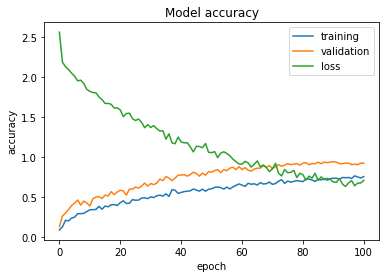

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

## Evaluación de los resultados

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        16
           1     0.9286    1.0000    0.9630        13
           2     0.9375    0.8824    0.9091        17
           3     0.9444    0.9444    0.9444        18
           4     1.0000    0.9474    0.9730        19
           5     0.9565    1.0000    0.9778        22
           6     0.8333    1.0000    0.9091        10
           7     0.8636    0.9500    0.9048        20
           8     1.0000    0.8462    0.9167        26

    accuracy                         0.9441       161
   macro avg     0.9404    0.9523    0.9442       161
weighted avg     0.9482    0.9441    0.9440       161



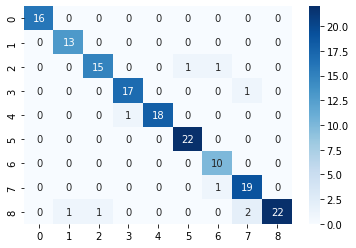

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

results = np.concatenate([(y, model.predict(x=x)) for x, y in val_ds], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4))

Comprobemos una imagen en concreto.

Siberian_Husky
True


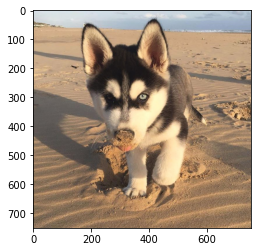

In [ ]:
img = keras.preprocessing.image.load_img(
    '/content/drive/My Drive/BreedsDog/Siberian_Husky/67.jpg', target_size=image_size
)
pil_im = Image.open('/content/drive/My Drive/BreedsDog/Siberian_Husky/67.jpg', 'r') 
imshow(np.asarray(pil_im))

breed_real="Siberian_Husky"
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 
predictions = model.predict(img_array)
index = np.argmax(predictions[0])
label_map = (train_ds.class_indices)
breed_estimated=list(label_map.keys())[index]
print(breed_estimated)
print(breed_real==breed_estimated)